## ML Assignment 01

Awais Raza 42 EE

In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("bezdekIris.data",names = ['Sepal Length','Sepal width','Petal Length','Petal width','Target'])

In [19]:
df

,Sepal Length,Sepal width,Petal Length,Petal width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
# Finding out the covariance matrix
df3 = df.iloc[:, :-1]
cov_matrix = df3.cov()
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
              Sepal Length  Sepal width  Petal Length  Petal width
Sepal Length      0.685694    -0.042434      1.274315     0.516271
Sepal width      -0.042434     0.189979     -0.329656    -0.121639
Petal Length      1.274315    -0.329656      3.116278     1.295609
Petal width       0.516271    -0.121639      1.295609     0.581006


In [21]:
from sklearn.model_selection import train_test_split
target = df['Target']
x = df.iloc[:, :-1]
x_train, x_test , y_train, y_test = train_test_split(x,target,test_size=0.2,random_state=42)

In [22]:
x_train.describe()

,Sepal Length,Sepal width,Petal Length,Petal width
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


## Analyzing the correlation

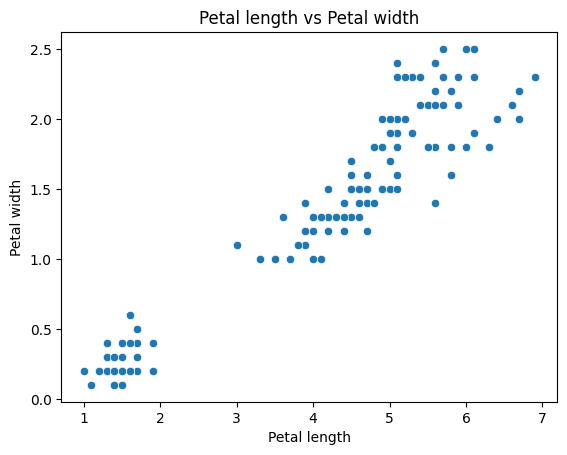

In [23]:
sns.scatterplot(x=df['Petal Length'],y=df['Petal width'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal length vs Petal width')
plt.show()

above graph shows that there is a correlation between petal length and petal width which can result in less accurate model therefore, it would 
better to drop either petal length or petal width for better performance

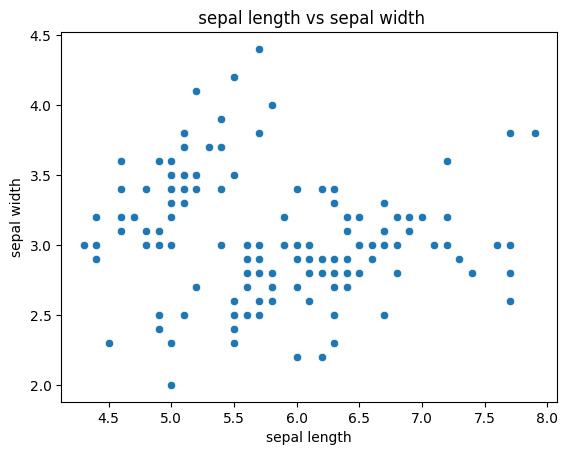

In [24]:
sns.scatterplot(x=df['Sepal Length'],y=df['Sepal width'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title(' sepal length vs sepal width')
plt.show()


From above graph, it is clear that there is no correlation between sepal length and sepal width

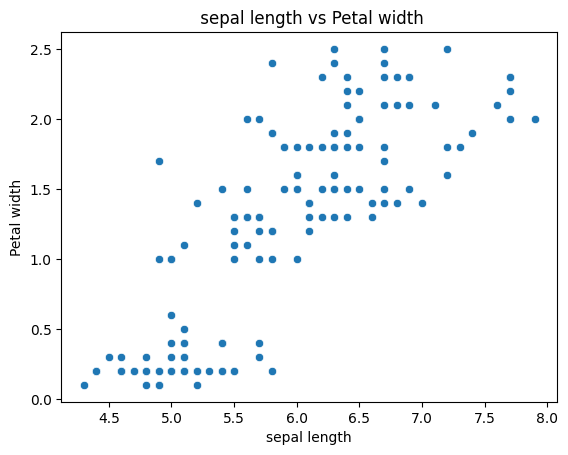

In [25]:
sns.scatterplot(x=df['Sepal Length'],y=df['Petal width'])
plt.xlabel('sepal length')
plt.ylabel('Petal width')
plt.title(' sepal length vs Petal width')
plt.show()


From above graph, it seems that sepal length and petal width are linearly related, but the data is scattered alot so it may not affect that much

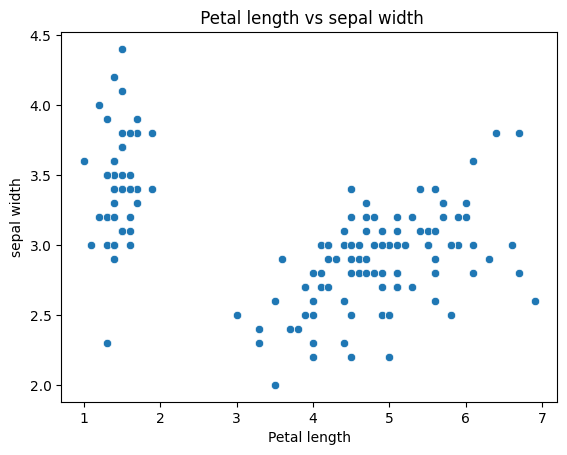

In [26]:
sns.scatterplot(x=df['Petal Length'],y=df['Sepal width'])
plt.xlabel('Petal length')
plt.ylabel('sepal width')
plt.title(' Petal length vs sepal width')
plt.show()


above graph shows no correlation whatsoever

## Performing cross-validation and Principal component analysis

In [27]:
# Performing scalling of the training data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_tr = s.fit_transform(x_train)
x_test_tr =  s.transform(x_test)

In [28]:
t = pd.DataFrame(x_train_tr)
round(t.describe()) # checking if values are normalized or not (mean should be zero)

,0,1,2,3
count,120.0,120.0,120.0,120.0
mean,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0
max,2.0,3.0,2.0,2.0


In [29]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_tr)
x_test_pca = pca.transform(x_test_tr)

In [30]:
eigenvectors = pd.DataFrame(x_train_pca)
print(round(eigenvectors.head() ))
eigenvectors.shape


     0    1    2    3
0 -3.0  0.0  0.0 -0.0
1 -2.0  3.0  0.0 -0.0
2  1.0  1.0 -1.0 -0.0
3 -2.0  0.0  0.0  0.0
4 -3.0 -0.0  0.0  0.0


(120, 4)

as expected, there are 4 eigenvectors, with eigenvector is of dimenstion (m x 1) where m is the number of examples

In [31]:
eigenvectors.iloc[:,0:2]

,0,1
0,-2.741058,0.415798
1,-2.214577,2.604762
2,0.926828,0.529167
3,-2.293429,0.108078
4,-2.524548,-0.496938
...,...,...
115,0.521362,-0.385743
116,0.415127,-1.535405
117,-2.159999,1.811532
118,0.377947,-0.947346


In [32]:
eigenvalues = list(np.round(pca.explained_variance_ ,decimals=4))
print(f"The eigenvalues for covariance matrix are {eigenvalues}")

The eigenvalues for covariance matrix are [2.9264, 0.9278, 0.1598, 0.0196]


In [33]:
# normalized eigenvalues
pca.explained_variance_ratio_

array([0.72551423, 0.23000922, 0.03960774, 0.00486882])

eigenvalues at index 0 [0.725] and 1 [0.23] plays a significant role and are close to containing 95% energy therefore eigenvectors 1 and 2 will be
selected and rest will be descarded

eigenvectors[:,0:2] are of our use

In [34]:
pca_data = pd.DataFrame(abs(pca.components_[:2]), columns= df.columns[:-1],index = ['pca component 1','pca component 2'])

In [35]:
pca_data

,Sepal Length,Sepal width,Petal Length,Petal width
pca component 1,0.517428,0.271201,0.582280,0.565392
pca component 2,0.391109,0.918127,0.021807,0.060009


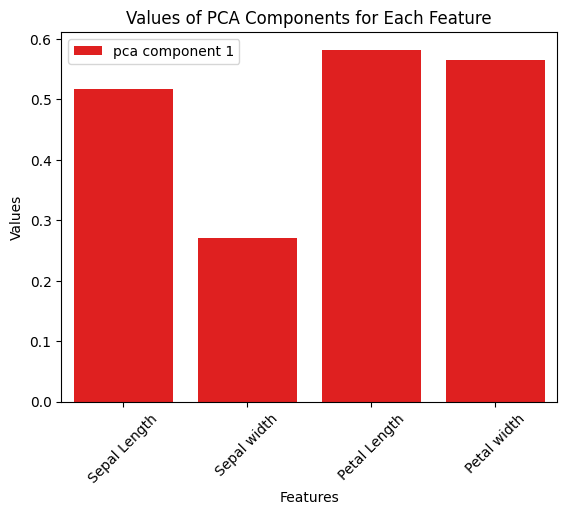

In [36]:
pca_data = pd.DataFrame(pca_data, index=['pca component 1', 'pca component 2'])

# Transpose the DataFrame for easier plotting
pca_data_transposed = pca_data.T.reset_index()

# Plotting using Seaborn barplot
sns.barplot(x='index', y='pca component 1', data=pca_data_transposed, color='red', label='pca component 1')
#sns.barplot(x='index', y='pca component 2', data=pca_data_transposed, color='orange', label='pca component 2')

plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Values of PCA Components for Each Feature')
plt.xticks(rotation=45)
plt.show()

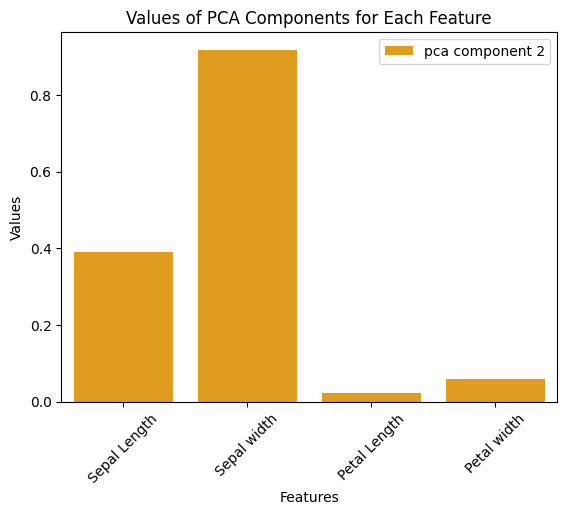

In [37]:
pca_data = pd.DataFrame(pca_data, index=['pca component 1', 'pca component 2'])

# Transpose the DataFrame for easier plotting
pca_data_transposed = pca_data.T.reset_index()

# Plotting using Seaborn barplot
sns.barplot(x='index', y='pca component 2', data=pca_data_transposed, color='orange', label='pca component 2')

plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Values of PCA Components for Each Feature')
plt.xticks(rotation=45)
plt.show()

In [38]:
A = pca.components_[:2]
A = A.T

In [39]:
x_train_array = np.array(x_train)

# Perform matrix multiplication to transform the data
transformed_data = np.dot(x_train_array, A)

In [55]:
transformed_data[:5,:] # shows pca1 and pca2 vlaues


array([[2.09920001, 5.13816856],
       [2.85562764, 6.32579565],
       [5.97962146, 5.64658937],
       [2.60629381, 5.04584919],
       [2.27887908, 4.69923801]])

In [41]:
transformed_data.shape

(120, 2)

In [42]:
new_features = pd.DataFrame(transformed_data, columns= ['pca1','pca2'])

In [43]:
new_features.shape

(120, 2)

In [44]:
new_features.head()

,pca1,pca2
0,2.099200,5.138169
1,2.855628,6.325796
2,5.979621,5.646589
3,2.606294,5.045849
4,2.278879,4.699238


In [45]:
# Performing index reset to avoid mismatching of rows
new_features.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Concatenating after resetting indexes
final_datas = pd.concat([new_features, y_train], axis=1)

In [46]:
final_datas = pd.concat([new_features, y_train], axis=1)


In [47]:
print(final_datas.head(121) )

         pca1      pca2           Target
0    2.099200  5.138169      Iris-setosa
1    2.855628  6.325796      Iris-setosa
2    5.979621  5.646589  Iris-versicolor
3    2.606294  5.045849      Iris-setosa
4    2.278879  4.699238      Iris-setosa
..        ...       ...              ...
115  5.461074  5.121762  Iris-versicolor
116  5.438819  4.411900   Iris-virginica
117  2.728088  5.979112      Iris-setosa
118  5.303547  4.814803  Iris-versicolor
119  7.482907  5.785937   Iris-virginica

[120 rows x 3 columns]


In [48]:
final_datas.shape

(120, 3)

PCA is performed and the 4 features are reduced to 2 by projecting them on pca1 and pca2 dimensions

## Completed